<div class="alert alert-success">
<font size="4"><p align="justify"><b>
<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>UJIAN AKHIR SEMESTER MACHINE LEARNING
<center><br><font size="5"><font face="calibri"><strong>Prediksi Penyakit Liver Menggunakan Metode Artificial Neural Network
<br><br>
<br><strong>Oleh :
<br>
<br><strong>Aldi Predyansyah
<br><strong>09011181722020
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

<div class="alert alert-success">
<font size="5"><p align="justify"><b>PENYAKIT LIVER

Penyakit liver merupakan penyakit yang terjadi ketika hati mengalami kerusakan yang cukup lumayan yang menyebabkan fungsi liver menjadi terngganggu bahkan jika kerusakan sudah parah akan membuat liver menjadi gagal fungsi dan harus di lakukan transplantasi hati . Penyakit liver sendiri terbagi menjadi dua yaitu:
- Penyakit Liver Akut
- Penyakit liver kronis
<br><br>
Dan berikut merupakan Penyebab dari penyakit Liver baik akut maupun Kronis :<br>
- Virus (seperti virus hepatitis)
- Minum alkohol berat
- Obat-obatan tertentu–misalnya, acetaminophen (Tylenol), dapat menyebabkan kerusakan liver yang parah pada orang yang juga memiliki penggunaan alkohol berat
- Paparan bahan kimia industri, termasuk pembersihan pelarut, cat aerosolized dan pengencer cat.
<br><br>
Serta berikut ini adalah gejala dari penyakit liver itu sendiri :<br>
- Kelelahan atau kelemahan
- Penyakit kuning (menguning mata dan kulit)
- Demam
- Mual dan muntah
- Urin Gelap atau tinja berwarna sangat pucat
- Sakit di bawah tulang rusuk di sisi kanan

<div class="alert alert-success">
<font size="5"><p align="justify"><b>DATASET INDIAN LIVER PATIENT

Saya menggunakan dataset Indian Liver Patient yang memiliki 583 data yang menjelaskan tentang data penyakit liver pada pasien di India. Dataset ini memiliki 10 variabel sebagai berikut:
1. Age (Age of the patient)
2. TB (Total Bilirubin)
3. DB (Direct Bilirubin)
4. Alkphos (Alkaline Phosphotase)
5. Sgpt (Alamine Aminotransferase)
6. Sgot (Aspartate Aminotransferase)
7. TP (Total Protiens)
8. ALB (Albumin)
9. A/G (Ratio Albumin and Globulin Ratio)
10. Class
    - 0 : Tidak Terdiagnosa Penyakit Liver
    - 1 : Terdiagnosa Penyakit Liver
    
Link Dataset : http://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29/3/machine-learning-databases/machine-learning-databases/machine-learning-databases/00225/

<div class="alert alert-success">
<font size="5"><p align="justify"><b>MEMANGGIL LIBRARY

Berikut library yang digunakan pada program kali ini :

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.optimizers import Adam
import pandas as pd
import sklearn

Using TensorFlow backend.


<div class="alert alert-success">
<font size="5"><p align="justify"><b>MEMANGGIL DATASET

Memanggil dataset yang berada di direktori disk

In [2]:
dataset = pd.read_csv("C:/Users/aldipred/Downloads/liver.csv")

Memanggil 5 data pertama dan 5 data terakhir dari dataset

In [3]:
#memanggil 5 data pertama
dataset.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [4]:
#memanggil 5 data terakhir
dataset.tail()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,1


Menampilkan informasi dari dataset

In [5]:
#menampilkan informasi
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
age        583 non-null int64
TB         583 non-null float64
DB         583 non-null float64
alkphos    583 non-null int64
sgpt       583 non-null int64
sgot       583 non-null int64
TP         583 non-null float64
ALB        583 non-null float64
A_G        583 non-null float64
class      583 non-null int64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


Terlihat diatas bahwa dataset memiliki 583 baris dimulai dari 0 sampai 582, dengan 10 variabel

<div class="alert alert-success">
<font size="5"><p align="justify"><b>PREPROCESSING

Berikut merupakan perintah untuk memisahkan antara fitur dan label:

In [6]:
fitur = dataset.iloc[:, 0:9].values #variabel fitur sebagai inputan dari 0 sampai 9
label = dataset.iloc[:, -1].values #variabel label sebagai outputan pada kolom terakhir

<div class="alert alert-success">
<font size="5"><p align="justify"><b>SEBARAN FITUR DIAGNOSIS

<div class="alert alert-success">
<font size="3"><p align="justify"><b>Inputan Dengan Histogram

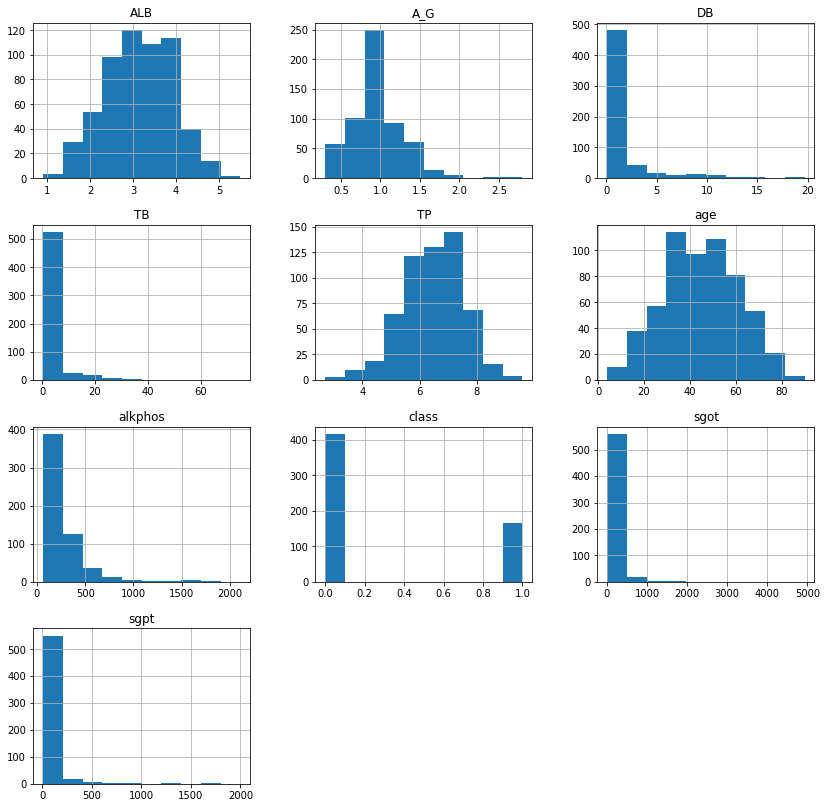

In [7]:
dataset.hist(figsize=(14,14)) #dataset ditampilkan dengan histogram
plt.show() #perintah menampilkan

<div class="alert alert-success">
<font size="3"><p align="justify"><b>Output Dengan Seaborn

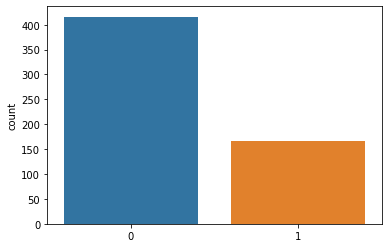

In [8]:
import seaborn as sns
sns.countplot(label) #persebaran output ditampilkan dengan seaborn

<div class="alert alert-success">
<font size="3"><p align="justify"><b>SPLITTING DATA

Untuk parameter:

- test_size : proporsi test set, dalam hal ini 0.2.
- train_size: proporsi train size. Jika tidak di set, maka akan menyesuaikan dengan test size (dalam kasus ini 0.8). Berlaku kebalikannya.
- random_state : konstan ini akan membuat hasil splitting tetap sama antar runtime atau antar mesin.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=20)

<div class="alert alert-success">
<font size="3"><p align="justify"><b>FEATURE SCALLING

Selanjutnya kita perlu menskalakan kolom-kolom yang dibutuhkan. Dalam hal ini saya menggunakan metode **Min-Max Scalling** <br><br>
&ensp; **Min-Max Scalling** bekerja dengan scaling data/menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), dengan rentang yang biasa digunakan adalah 0

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #menggunakan metode MinMaxScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# One hot encode target values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\aldipred\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<div class="alert alert-success">
<font size="5"><p align="justify"><b>ARTIFICIAL NEURAL NETWORK

- Artificial Neural Network adalah paradigma
pengolahan informasi yang terinspirasi oleh sistem saraf secara biologis, seperti
proses informasi pada otak manusia.
- ANN adalah tools yang sangat baik untuk menemukan pola yang terlalu rumit atau banyak bagi seorang programmer untuk mengekstraksi dan mengajarkan mesin untuk mengenali sesuatu.
- Lapisan-lapisan penyusun ANN dibagi menjadi 3, yaitu
lapisan input (input layer), lapisan tersembunyi (hidden layer), dan lapisan output
(ouput layer)

<div class="alert alert-success">
<font size="3"><p align="justify"><b> MODEL ARTIFICIAL NEURAL NETWORK

Dalam hal ini digunakan model Sequential(). 
1. Input layer -> Layer pertama terbentuk dari 9 layer Neural sesuai fitur dengan menggunakan activation relu.
2. Hidden Layer -> 18 units Neural Network dengan menggunakan activation relu.
3. Output layer -> 2 unit Neural Network dengan menggunakan activation sigmoid.

In [12]:
model = Sequential()

#Hidden Layer Dan Input Layer
model.add(Dense(units=18, input_dim = 9, activation='relu'))

#Output Layer
model.add(Dense(units= 2, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<div class="alert alert-success">
<font size="3"><p align="justify"><b>TRAINING MODEL

In [13]:
#Proses training
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, 
                         epochs=30)

Train on 466 samples, validate on 117 samples
Epoch 1/30
466/466 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4227 - val_loss: 0.6974 - val_accuracy: 0.4188
Epoch 2/30
466/466 [==============================] - 0s 86us/step - loss: 0.6939 - accuracy: 0.4635 - val_loss: 0.6919 - val_accuracy: 0.4786
Epoch 3/30
466/466 [==============================] - 0s 103us/step - loss: 0.6886 - accuracy: 0.5118 - val_loss: 0.6863 - val_accuracy: 0.5171
Epoch 4/30
466/466 [==============================] - 0s 77us/step - loss: 0.6833 - accuracy: 0.5451 - val_loss: 0.6805 - val_accuracy: 0.5385
Epoch 5/30
466/466 [==============================] - 0s 103us/step - loss: 0.6777 - accuracy: 0.5719 - val_loss: 0.6742 - val_accuracy: 0.6282
Epoch 6/30
466/466 [==============================] - 0s 69us/step - loss: 0.6717 - accuracy: 0.6298 - val_loss: 0.6674 - val_accuracy: 0.6880
Epoch 7/30
466/466 [==============================] - 0s 94us/step - loss: 0.6656 - accuracy: 0

<div class="alert alert-success">
<font size="3"><p align="justify"><b>MENGHITUNG AKURASI

Berikut hasil akurasinya:

In [14]:
testing = model.evaluate(X_test, y_test)
testing

117/117 [==============================] - 0s 171us/step


[0.5742678071698571, 0.7179487347602844]

<div class="alert alert-success">
<font size="3"><p align="justify"><b> PLOT MODEL AKURASI

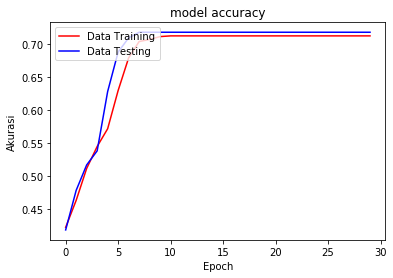

In [15]:
plt.plot(training.history['accuracy'],color = 'red')
plt.plot(training.history['val_accuracy'], color = 'blue')
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

<div class="alert alert-success">
<font size="3"><p align="justify"><b> PLOT MODEL LOSS

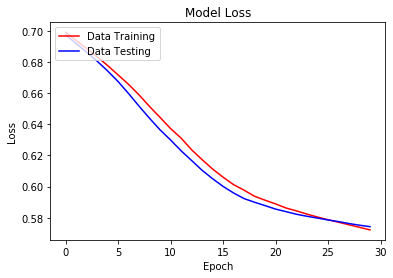

In [16]:
plt.plot(training.history['loss'], color='red')
plt.plot(training.history['val_loss'], color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

In [17]:
prediction_x = model.predict_classes(X_test)

In [18]:
#mengubah data y_test kedalam bentuk array
prediction_y = [np.argmax(t) for t in y_test]
prediction_y = np.array(prediction_y)

<div class="alert alert-success">
<font size="5"><p align="justify"><b> EVALUASI MODEL

**Confusion Matrix** adalah teknik untuk meringkas perfomance dari algoritma klasifikasinya.

Klasifikasi akurasi bisa saja *misleading* jika memiliki jumlah pengamatan yang tidak sama di setiap kelas atau jika  memiliki lebih dari dua kelas dalam dataset Anda.

In [19]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(prediction_x, prediction_y)
cm = ConfusionMatrix
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[84 33]
 [ 0  0]]


<div class="alert alert-success">
<font size="5"><p align="justify"><b> EVALUASI MODEL DENGAN CONFUSION MATRIKS

<div class="alert alert-success">
<font size="4"><p align="justify"><b> 1. AKURASI

Akurasi adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.<br><br>
Berikut cara menghitung nilai akurasi pada confusion matriks:

\begin{split}Akurasi = \frac{TP+TN} {TP+FP+FN+TN}\end{split}

In [20]:
#rumus menghitung akurasi
akurasi = (tp+tn) / (tp+fp+fn+tn)
print("Hasil Akurasi = ", akurasi)

Hasil Akurasi =  0.717948717948718


<div class="alert alert-success">
<font size="4"><p align="justify"><b> 2. PRECISION

Presisi adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.<br><br>
Berikut cara menghitung nilai precision pada confusion matriks:

\begin{split}Precision = \frac{TP} {TP+FP}\end{split}

In [21]:
#rumus menghitung presisi
precision = tp / ( tp + fp )
print("Hasil Precision = ", precision)

Hasil Precision =  0.717948717948718


<div class="alert alert-success">
<font size="4"><p align="justify"><b> 3. RECALL

Recall (Sensitifitas) adalah rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.<br><br>
Berikut cara menghitung nilai recall pada confusion matriks:

\begin{split}Recall = \frac{TP} {TP+FN}\end{split}

In [22]:
#rumus menghitung recall
recall = tp/(tp+fn)
print("Hasil Recall = ",recall)

Hasil Recall =  1.0


<div class="alert alert-success">
<font size="4"><p align="justify"><b> 4. SPECIFICITY

Specificity adalah kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif.<br><br>
Berikut cara menghitung nilai specificity pada confusion matriks:
\begin{split}Specificity = \frac{TN} {TN+FP}\end{split}

In [23]:
#rumus menghitung specificity
specificity = tn/(tn+fp)
print("Hasil Specificity = ", specificity)

Hasil Specificity =  0.0


<div class="alert alert-success">
<font size="4"><p align="justify"><b> 5. F1 SCORE

F1 Score adalah perbandingan rata-rata presisi dan recall yang dibobotkan.<br><br>
Berikut cara menghitung nilai F1 pada confusion matriks:

\begin{split}F1  Score = \frac {2 \times Recall \times Precision} {Recall + Precision}\end{split}

In [24]:
#rumus menghitung F1 score
f1=(2*precision*recall)/ (precision+recall)
print("Hasil F1 = ",f1)

Hasil F1 =  0.835820895522388
